In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model
from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,gvtec3,gvtec3_dt,s4
2013-12-01 02:10:00,38.901869,-1.406371,0.090805,-3.012794,-0.302865,-0.138129,-2.709478,-0.748023,-0.046265,0.116034
2013-12-01 02:20:00,37.676039,-1.201542,0.204829,-3.176458,-0.149123,-1.840996,-1.712064,-0.797389,-0.046810,0.112015
2013-12-01 02:30:00,36.751092,-0.957067,0.244475,-3.090844,0.030793,-2.211419,-0.669840,-0.815543,-0.040540,0.111552
2013-12-01 02:40:00,36.059834,-0.762969,0.194098,-2.880283,0.127728,-1.957485,-0.038873,-0.858718,-0.060494,0.108269
2013-12-01 02:50:00,35.416633,-0.653073,0.109896,-2.733366,0.097938,-1.737745,0.141762,-0.969081,-0.102394,0.106616


# Árvore de Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.916274
f1               0.433082
far              0.588753
fn              48.100000
fp              58.400000
kappa            0.034915
me               0.393640
mse              0.003352
pod              0.459551
precission       0.411247
re              18.032906
recall           0.459551
tn            1124.600000
tp              40.900000
tse              2.063190
dtype: float64


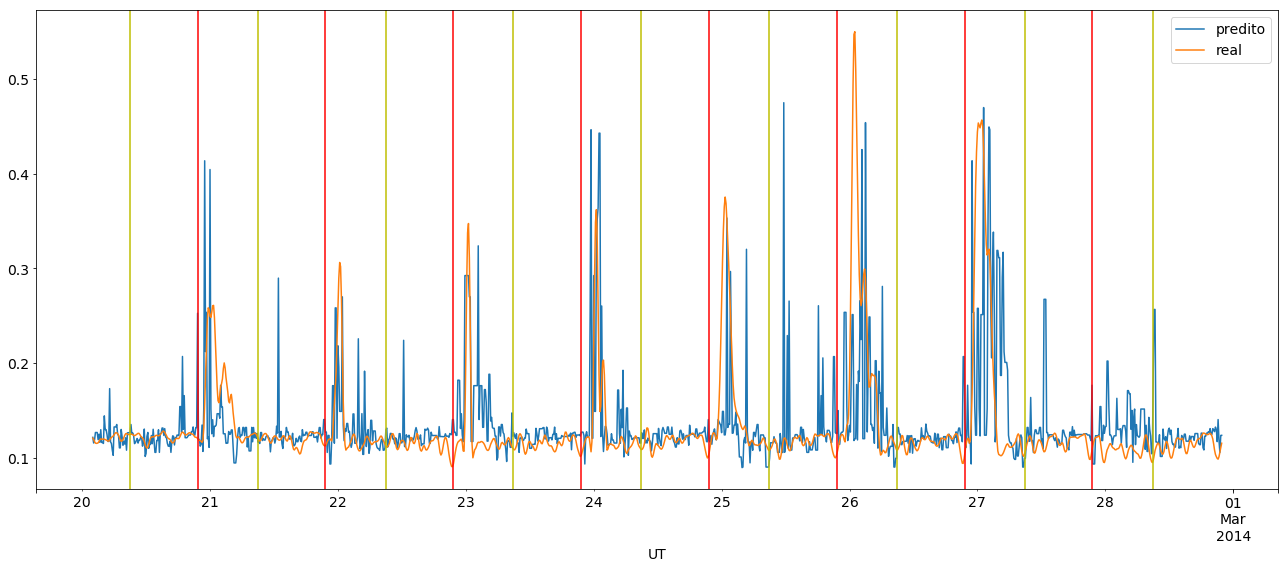

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4',
                                         file_to_save_model='./images/regression_cart.eps')

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.886557
f1               0.375044
far              0.695314
fn              45.500000
fp              98.800000
kappa            0.033149
me               0.383372
mse              0.004329
pod              0.488764
precission       0.304686
re              23.229738
recall           0.488764
tn            1084.200000
tp              43.500000
tse              2.345457
dtype: float64


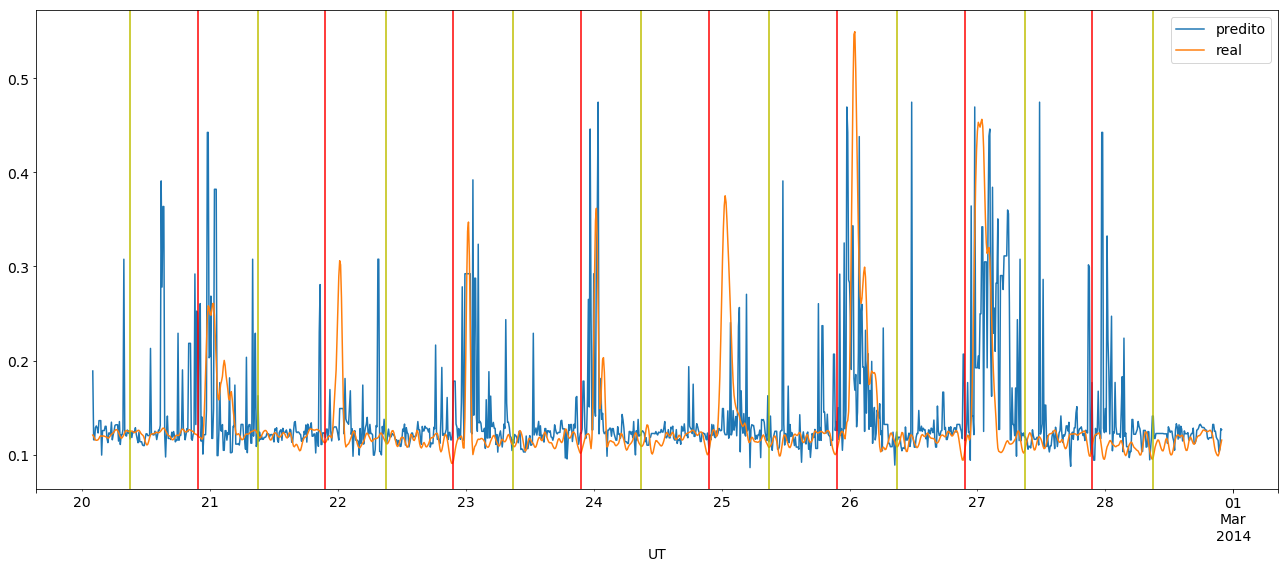

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.911950
f1               0.414852
far              0.611300
fn              49.300000
fp              62.700000
kappa            0.035671
me               0.407150
mse              0.003406
pod              0.446067
precission       0.388700
re              18.768775
recall           0.446067
tn            1120.300000
tp              39.700000
tse              2.081131
dtype: float64


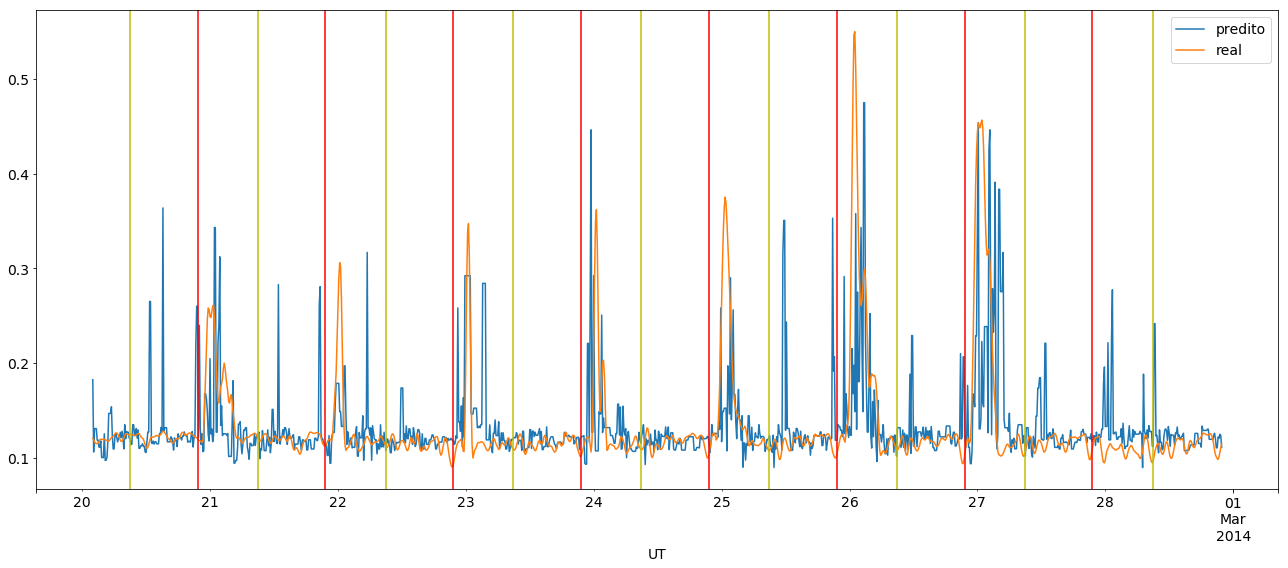

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.912343
f1               0.408716
far              0.612161
fn              50.100000
fp              61.400000
kappa            0.036243
me               0.367633
mse              0.003268
pod              0.437079
precission       0.387839
re              17.741841
recall           0.437079
tn            1121.600000
tp              38.900000
tse              2.036619
dtype: float64


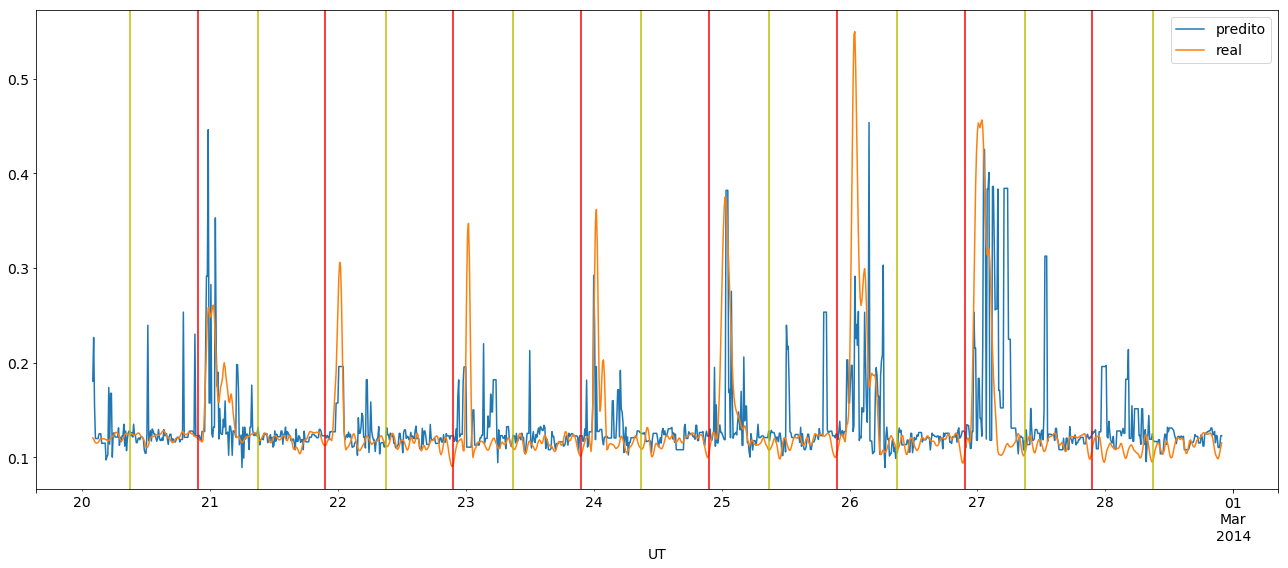

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.904796
f1               0.380715
far              0.649800
fn              51.800000
fp              69.300000
kappa            0.037239
me               0.397951
mse              0.003818
pod              0.417978
precission       0.350200
re              19.411925
recall           0.417978
tn            1113.700000
tp              37.200000
tse              2.202157
dtype: float64


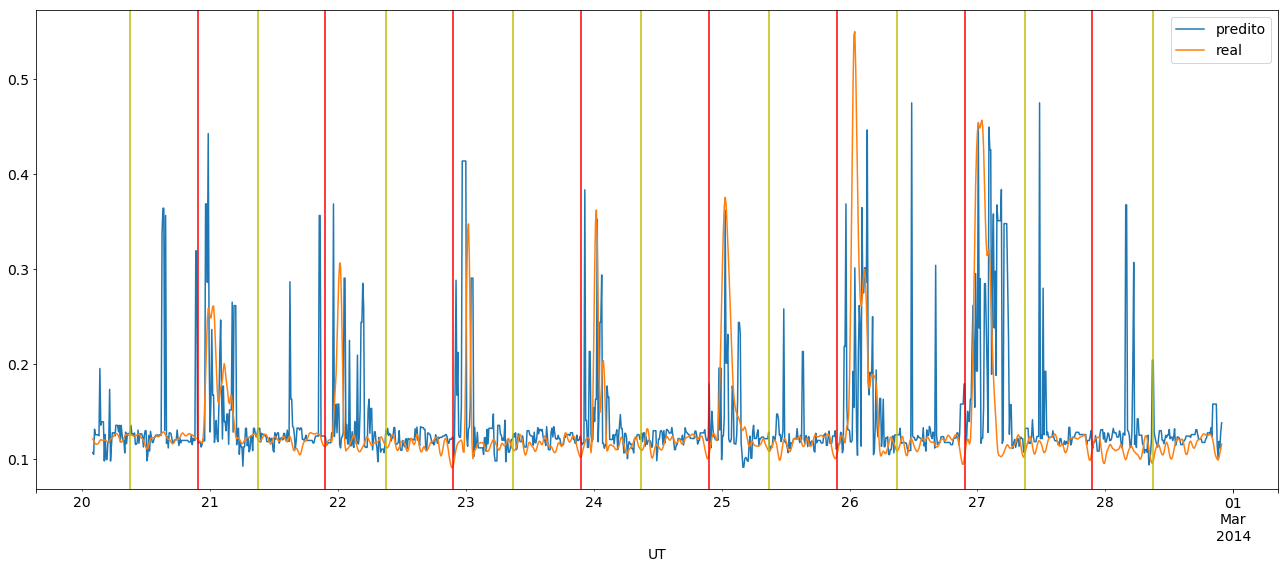

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.907547
f1               0.348461
far              0.655653
fn              57.300000
fp              60.300000
kappa            0.040975
me               0.393140
mse              0.003656
pod              0.356180
precission       0.344347
re              18.339272
recall           0.356180
tn            1122.700000
tp              31.700000
tse              2.154945
dtype: float64


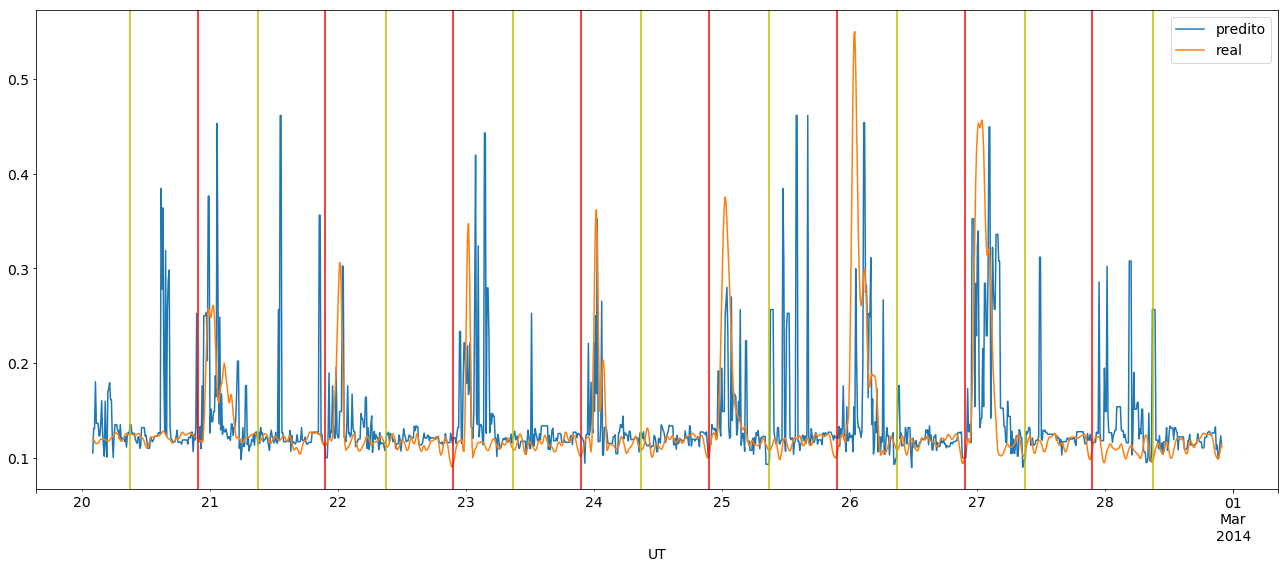

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']

Error for the time series sample:
acc              0.893003
f1               0.348758
far              0.696607
fn              52.400000
fp              83.700000
kappa            0.037473
me               0.358983
mse              0.004078
pod              0.411236
precission       0.303393
re              21.111469
recall           0.411236
tn            1099.300000
tp              36.600000
tse              2.274875
dtype: float64


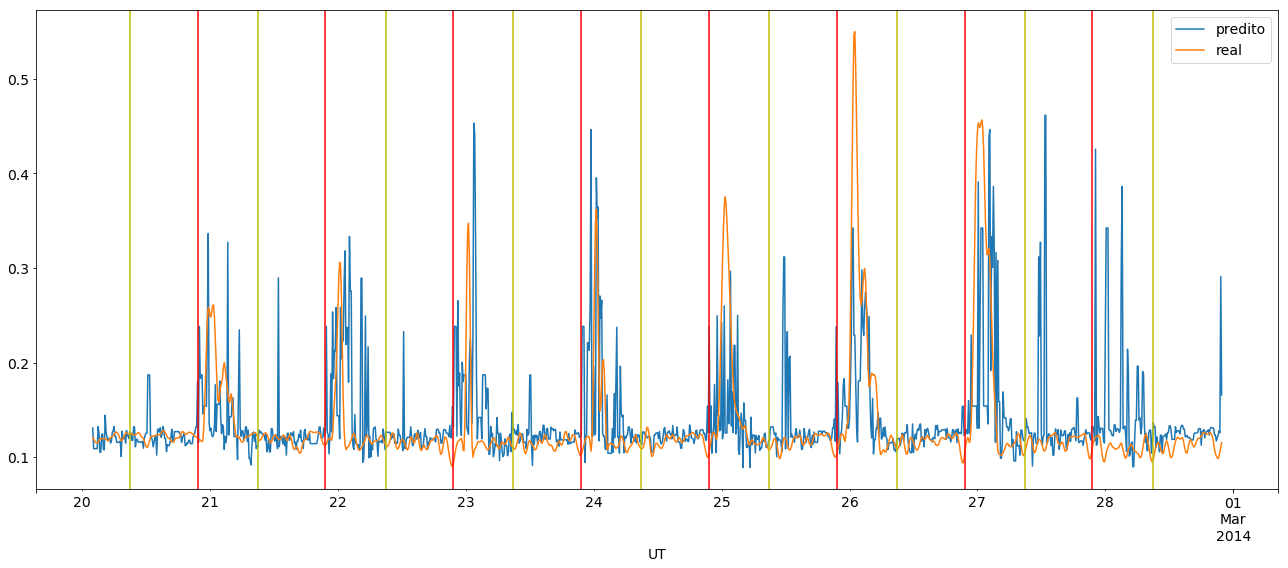

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']

Error for the time series sample:
acc              0.919104
f1               0.460154
far              0.566610
fn              45.100000
fp              57.800000
kappa            0.032941
me               0.410934
mse              0.003042
pod              0.493258
precission       0.433390
re              17.050749
recall           0.493258
tn            1125.200000
tp              43.900000
tse              1.964933
dtype: float64


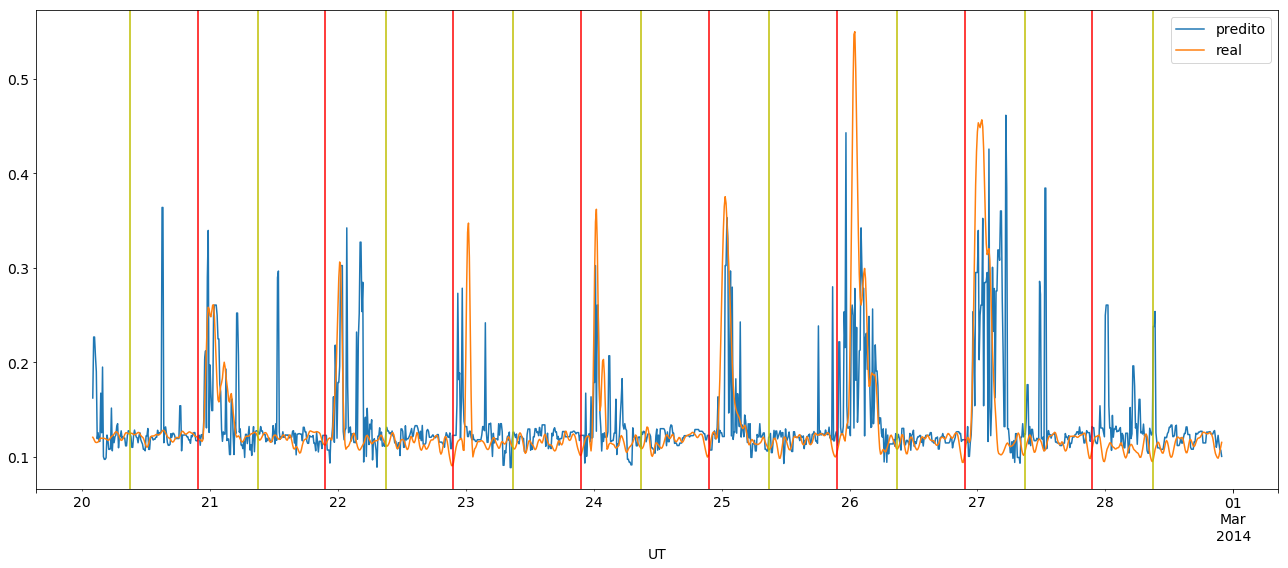

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor
dict_error = generate_and_avaliate_model(model=model,
                                         df=df,
                                         instances_set=instances_set,
                                         target='s4')